In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\hp\Downloads\heights.csv")
df.head()

,name,height
0,mohit,5.3
1,sakshi,5.2
2,arun,5.1
3,varun,4.9
4,ani,7.1


In [3]:
# detect outliers using percengtile method

max_threshold = df["height"].quantile(0.95)
max_threshold

7.4799999999999995

In [4]:
df[df["height"] > max_threshold]

,name,height
11,ramesh,8.0


In [5]:
min_threshold = df["height"].quantile(0.05)
min_threshold

3.6050000000000004

In [7]:
df[df["height"] < min_threshold]

,name,height
7,anil,1.2


In [12]:
# remove outliers

df[(df["height"] < max_threshold) & (df["height"] > min_threshold)]

,name,height
0,mohit,5.3
1,sakshi,5.2
2,arun,5.1
3,varun,4.9
4,ani,7.1
5,amit,6.4
6,amita,6.5
8,sudha,6.0
9,ram,5.1
10,kamal,5.6


In [13]:
blr = pd.read_csv(r"C:\Users\hp\Downloads\Bengaluru_House_Data.csv")
blr.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [14]:
blr.shape

(13320, 9)

In [15]:
blr.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [18]:
blr.drop("area_type", axis = 1).head()

,availability,location,size,society,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [19]:
blr["society"].isnull().sum()

5502

In [20]:
blr.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [28]:
type(blr["total_sqft"][0])

str

In [29]:
min_threshold, max_threshold = blr["price"]. quantile([0.001, 0.999])
min_threshold, max_threshold

(11.159500000000001, 2000.0)

In [30]:
blr[blr["price"] < min_threshold]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
171,Super built-up Area,Ready To Move,Attibele,1 BHK,Jae 1hu,450,1.0,1.0,11.00
942,Built-up Area,Ready To Move,Attibele,1 BHK,Jae 2hu,400,1.0,1.0,11.00
1471,Built-up Area,18-Mar,Kengeri,1 BHK,NaN,340,1.0,1.0,10.00
2437,Built-up Area,Ready To Move,Attibele,1 BHK,Jae 1hu,395,1.0,1.0,10.25
4113,Super built-up Area,18-Jan,BTM Layout,3 BHK,NaN,167Sq. Meter,3.0,2.0,10.00
5410,Super built-up Area,Ready To Move,Attibele,1 BHK,Jae 1hu,400,1.0,1.0,10.00
7482,Super built-up Area,Ready To Move,Alur,1 BHK,NaN,470,2.0,1.0,10.00
8594,Built-up Area,Ready To Move,Chandapura,1 BHK,NaN,450,1.0,1.0,9.00
8653,Plot Area,Ready To Move,Doddaballapur,2 Bedroom,NaN,640,1.0,0.0,10.50
10526,Super built-up Area,Ready To Move,Yelahanka New Town,1 BHK,KHatsFl,284,1.0,1.0,8.00


In [32]:
blr[blr["price"] > max_threshold]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
408,Super built-up Area,19-Jan,Rajaji Nagar,7 BHK,NaN,12000,6.0,3.0,2200.0
605,Super built-up Area,19-Jan,Malleshwaram,7 BHK,NaN,12000,7.0,3.0,2200.0
2623,Plot Area,18-Jul,Dodsworth Layout,4 Bedroom,NaN,30000,4.0,NaN,2100.0
3180,Super built-up Area,Ready To Move,Shanthala Nagar,5 BHK,Kierser,8321,5.0,3.0,2700.0
4162,Built-up Area,Ready To Move,Yemlur,4 Bedroom,Epllan,7000,5.0,NaN,2050.0
6421,Plot Area,18-Sep,Bommenahalli,4 Bedroom,Prood G,2940,3.0,2.0,2250.0
10304,Plot Area,Ready To Move,5th Block Jayanagar,4 Bedroom,NaN,10624,4.0,2.0,2340.0
11080,Super built-up Area,18-Jan,Ashok Nagar,4 BHK,NaN,8321,5.0,2.0,2912.0
11763,Plot Area,Ready To Move,Sadashiva Nagar,5 Bedroom,NaN,9600,7.0,2.0,2736.0
12443,Plot Area,Ready To Move,Dollars Colony,4 Bedroom,NaN,4350,8.0,NaN,2600.0


In [34]:
# remove outliers

blr_new = blr[(blr["price"] < max_threshold) & (blr["price"] > min_threshold)]
blr_new.shape

(13291, 9)

In [35]:
# heatmap

import seaborn as sb

In [36]:
relation = blr_new.corr()
relation

,bath,balcony,price
bath,1.000000,0.201944,0.492412
balcony,0.201944,1.000000,0.120541
price,0.492412,0.120541,1.000000


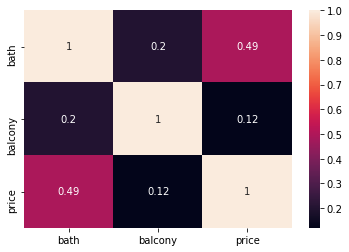

In [39]:
sb.heatmap(relation, annot = True);

In [40]:
df["z_score"] = (df["height"] - df["height"].mean())/df["height"].std()
df.head()

,name,height,z_score
0,mohit,5.3,-0.238392
1,sakshi,5.2,-0.301363
2,arun,5.1,-0.364335
3,varun,4.9,-0.490278
4,ani,7.1,0.895094
